Setup

In [1]:
!pip install -r ../requirements.txt
import visualising_poetry as vp
import settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
from IPython.display import display, HTML

vp.setup_if_needed()


## Publications

### Titles in the dataset

In [2]:
# get the data
df = vp.pickle_as_single_data_frame()

# get a list of titles
titles = df[vp.PUB_TITLE].unique()

print(titles)

['British Magazine' 'Norwich Gazette' 'Museum'
 'London Daily Post and General Advertiser' 'Universal' 'Craftsman'
 'Magazine of Magazines (London)' 'Weekly Miscellany' 'London Magazine'
 'London Evening Post' 'Gentlemans' 'Daily Gazetteer' 'Scots'
 'Universal Spectator' 'Common Sense' 'Ladies Magazine'
 'General Evening Post' 'Westminster Journal' 'Dublin Journal'
 'Newcastle General Magazine' 'London Morning Advertiser'
 'St James Evening Post']


### Titles (showing original vs copies)

,Total poems,Originals,Originals as %,Copies,Copies as %
1746,120.0,106.0,88.333333,14.0,11.666667
1747,130.0,101.0,77.692308,29.0,22.307692
1748,152.0,128.0,84.210526,24.0,15.789474
1749,150.0,126.0,84.000000,24.0,16.000000
1750,115.0,88.0,76.521739,27.0,23.478261
1751,25.0,7.0,28.000000,18.0,72.000000


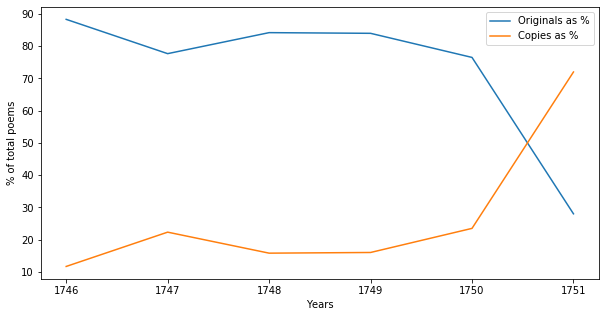

,Total poems,Originals,Originals as %,Copies,Copies as %
1741,8.0,1.0,12.5,7.0,87.5
1742,8.0,7.0,87.5,1.0,12.5


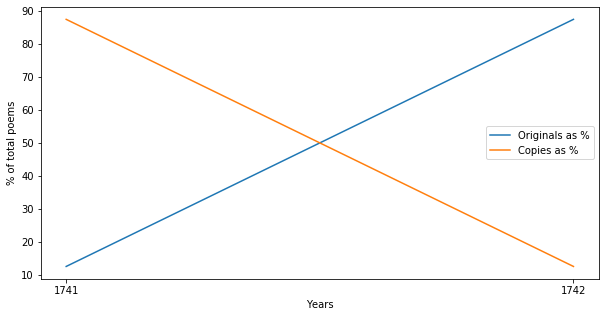

,Total poems,Originals,Originals as %,Copies,Copies as %
1746,79.0,65.0,82.278481,14.0,17.721519
1747,68.0,46.0,67.647059,22.0,32.352941


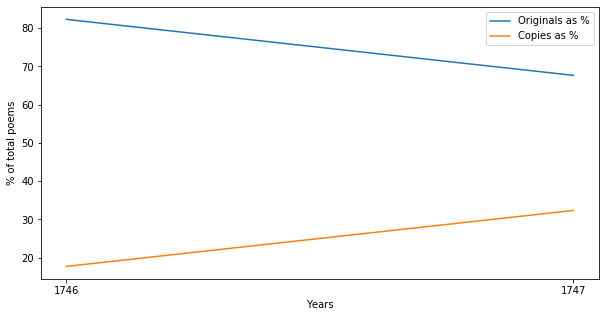

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,21.0,17.0,80.952381,4.0,19.047619
1741,19.0,13.0,68.421053,6.0,31.578947


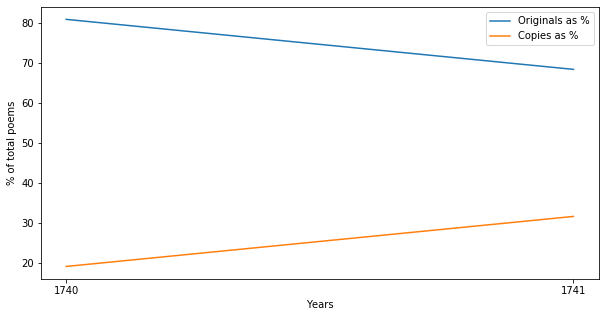

,Total poems,Originals,Originals as %,Copies,Copies as %
1750,117.0,67.0,57.264957,50.0,42.735043


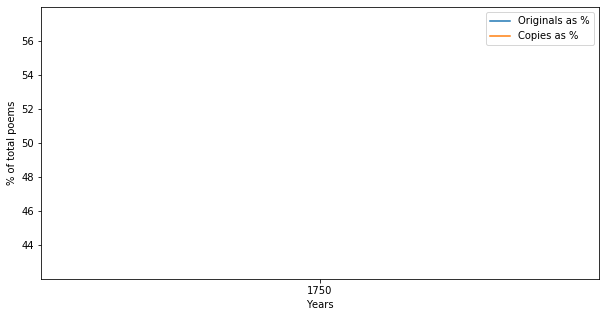

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,13.0,8.0,61.538462,5.0,38.461538
1741,5.0,4.0,80.000000,1.0,20.000000


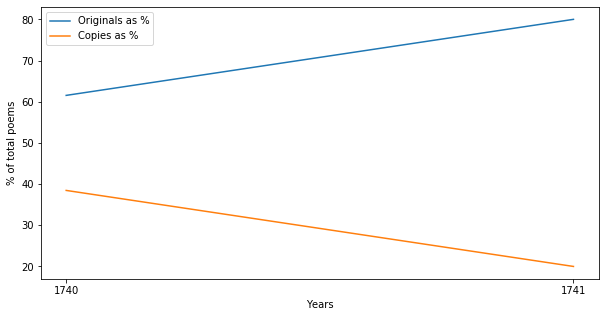

,Total poems,Originals,Originals as %,Copies,Copies as %
1750,97.0,53.0,54.639175,44.0,45.360825
1751,51.0,32.0,62.745098,19.0,37.254902


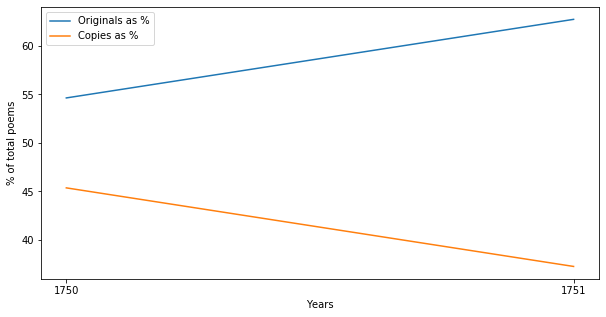

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,7.0,5.0,71.428571,2.0,28.571429
1741,3.0,3.0,100.000000,0.0,0.000000


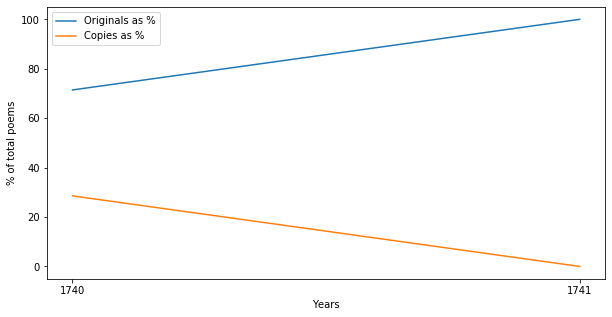

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,171.0,132.0,77.192982,39.0,22.807018
1741,163.0,107.0,65.644172,56.0,34.355828
1742,125.0,85.0,68.000000,40.0,32.000000
1743,163.0,106.0,65.030675,57.0,34.969325
1744,126.0,96.0,76.190476,30.0,23.809524
1745,158.0,105.0,66.455696,53.0,33.544304
1746,125.0,93.0,74.400000,32.0,25.600000
1747,192.0,122.0,63.541667,70.0,36.458333
1748,178.0,121.0,67.977528,57.0,32.022472
1749,251.0,167.0,66.533865,84.0,33.466135


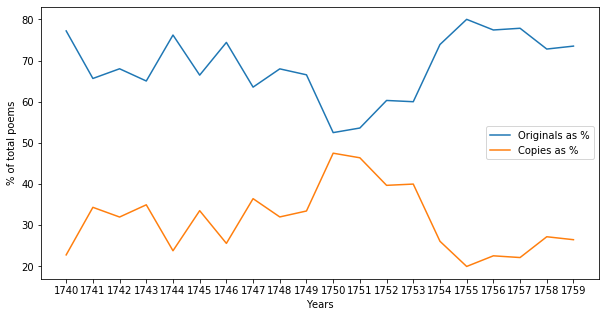

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,34.0,20.0,58.823529,14.0,41.176471
1741,52.0,30.0,57.692308,22.0,42.307692
1742,41.0,19.0,46.341463,22.0,53.658537
1743,55.0,27.0,49.090909,28.0,50.909091
1744,56.0,43.0,76.785714,13.0,23.214286
1745,49.0,19.0,38.775510,30.0,61.224490
1746,38.0,25.0,65.789474,13.0,34.210526
1747,70.0,34.0,48.571429,36.0,51.428571
1748,92.0,66.0,71.739130,26.0,28.260870
1749,115.0,86.0,74.782609,29.0,25.217391


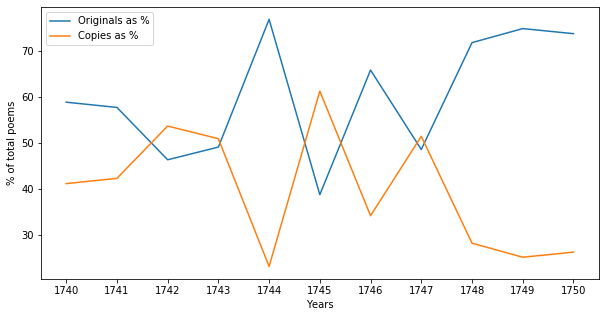

/Users/cmmaj/Development/workspaces/VisualisingPoeticCulture/venv/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars
/Users/cmmaj/Development/workspaces/VisualisingPoeticCulture/venv/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in long_scalars


,Total poems,Originals,Originals as %,Copies,Copies as %
1740,251.0,184.0,73.306773,67.0,26.693227
1741,243.0,187.0,76.954733,56.0,23.045267
1742,0.0,0.0,NaN,0.0,NaN
1743,0.0,0.0,NaN,0.0,NaN
1744,0.0,0.0,NaN,0.0,NaN
1745,0.0,0.0,NaN,0.0,NaN
1746,284.0,237.0,83.450704,47.0,16.549296
1747,297.0,226.0,76.094276,71.0,23.905724
1748,0.0,0.0,NaN,0.0,NaN
1749,0.0,0.0,NaN,0.0,NaN


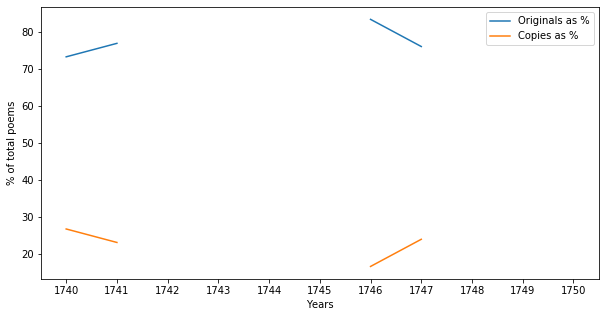

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,30.0,27.0,90.000000,3.0,10.000000
1741,99.0,32.0,32.323232,67.0,67.676768


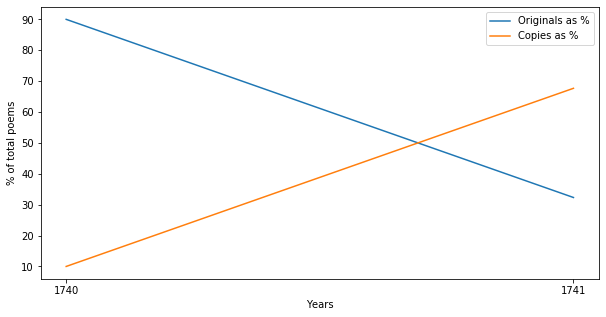

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,135.0,55.0,40.740741,80.0,59.259259
1741,140.0,66.0,47.142857,74.0,52.857143
1742,117.0,67.0,57.264957,50.0,42.735043
1743,107.0,68.0,63.551402,39.0,36.448598
1744,74.0,52.0,70.270270,22.0,29.729730
1745,79.0,52.0,65.822785,27.0,34.177215
1746,62.0,17.0,27.419355,45.0,72.580645
1747,78.0,32.0,41.025641,46.0,58.974359
1748,91.0,38.0,41.758242,53.0,58.241758
1749,91.0,45.0,49.450549,46.0,50.549451


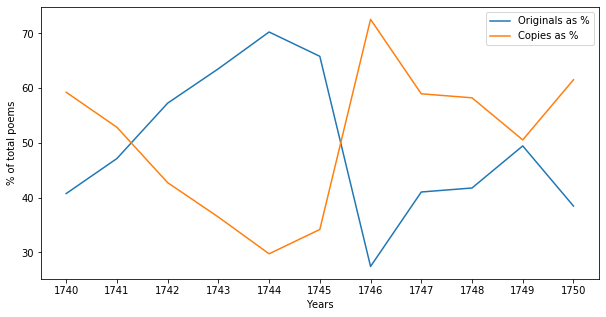

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,37.0,22.0,59.459459,15.0,40.540541
1741,49.0,36.0,73.469388,13.0,26.530612
1742,82.0,47.0,57.317073,35.0,42.682927
1743,50.0,33.0,66.000000,17.0,34.000000
1744,71.0,65.0,91.549296,6.0,8.450704
1745,61.0,54.0,88.524590,7.0,11.475410
1746,14.0,14.0,100.000000,0.0,0.000000


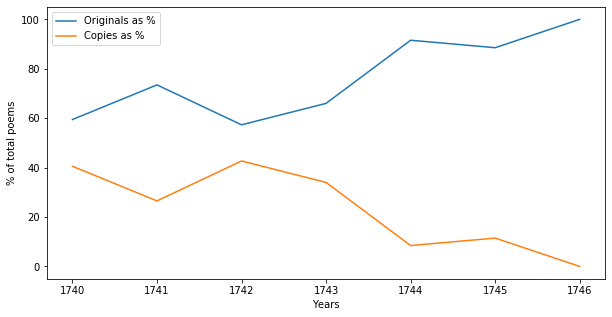

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,27.0,10.0,37.037037,17.0,62.962963
1741,13.0,8.0,61.538462,5.0,38.461538


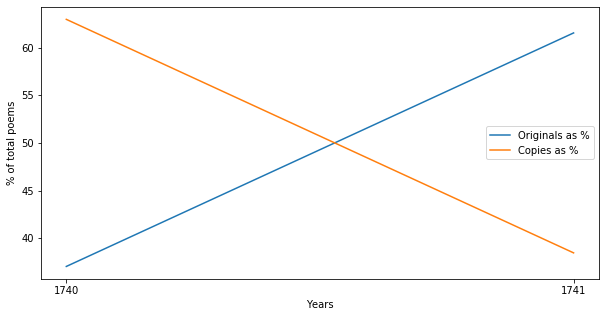

,Total poems,Originals,Originals as %,Copies,Copies as %
1749,23.0,12.0,52.173913,11.0,47.826087
1750,211.0,118.0,55.924171,93.0,44.075829
1751,193.0,124.0,64.248705,69.0,35.751295
1752,149.0,87.0,58.389262,62.0,41.610738
1753,157.0,111.0,70.700637,46.0,29.299363


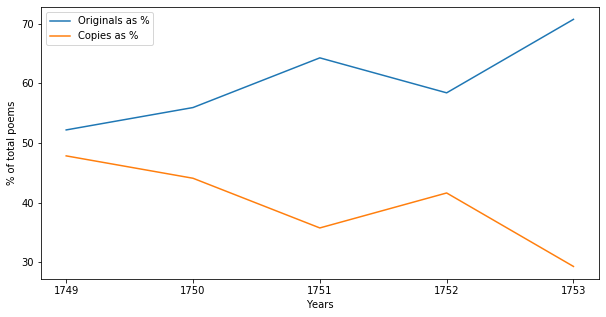

,Total poems,Originals,Originals as %,Copies,Copies as %
1740,9.0,5.0,55.555556,4.0,44.444444
1741,0.0,0.0,NaN,0.0,NaN
1742,0.0,0.0,NaN,0.0,NaN
1743,10.0,8.0,80.000000,2.0,20.000000
1744,0.0,0.0,NaN,0.0,NaN
1745,19.0,9.0,47.368421,10.0,52.631579
1746,0.0,0.0,NaN,0.0,NaN
1747,27.0,9.0,33.333333,18.0,66.666667
1748,37.0,19.0,51.351351,18.0,48.648649
1749,0.0,0.0,NaN,0.0,NaN


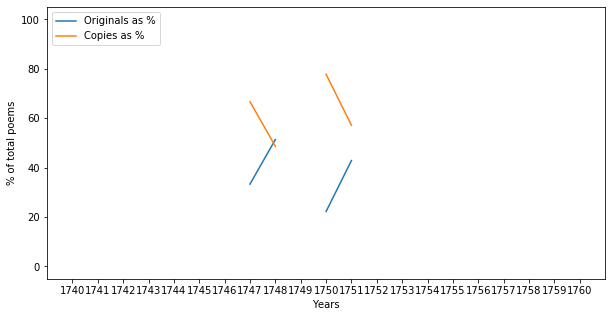

,Total poems,Originals,Originals as %,Copies,Copies as %
1745,35.0,32.0,91.428571,3.0,8.571429


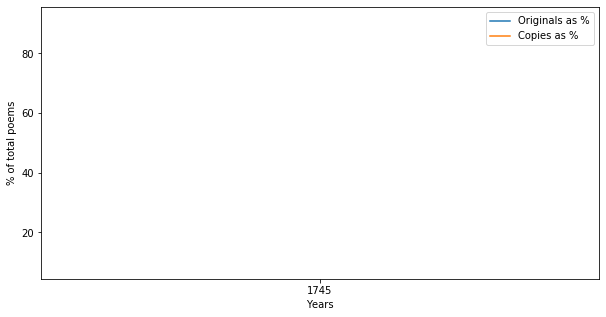

,Total poems,Originals,Originals as %,Copies,Copies as %
1745,60.0,35.0,58.333333,25.0,41.666667
1746,64.0,33.0,51.562500,31.0,48.437500
1747,47.0,15.0,31.914894,32.0,68.085106


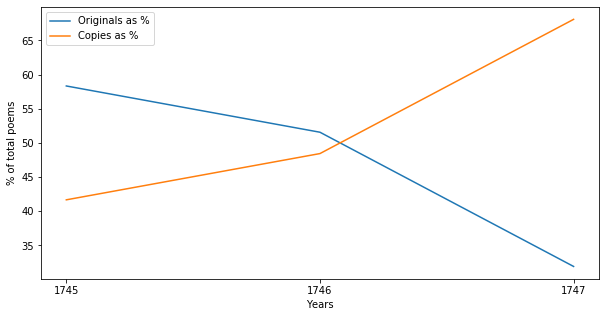

,Total poems,Originals,Originals as %,Copies,Copies as %
1747,190.0,73.0,38.421053,117.0,61.578947
1748,130.0,79.0,60.769231,51.0,39.230769
1749,112.0,46.0,41.071429,66.0,58.928571
1750,106.0,36.0,33.962264,70.0,66.037736
1751,84.0,32.0,38.095238,52.0,61.904762
1752,81.0,38.0,46.913580,43.0,53.086420
1753,71.0,26.0,36.619718,45.0,63.380282
1754,80.0,41.0,51.250000,39.0,48.750000
1755,77.0,42.0,54.545455,35.0,45.454545
1756,66.0,35.0,53.030303,31.0,46.969697


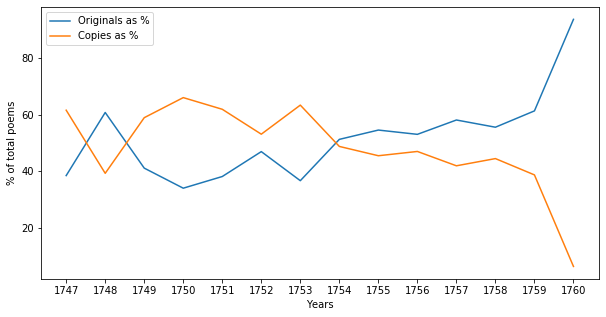

,Total poems,Originals,Originals as %,Copies,Copies as %
1741,11.0,5.0,45.454545,6.0,54.545455


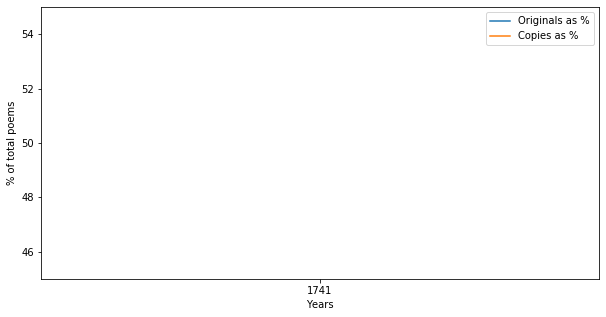

,Total poems,Originals,Originals as %,Copies,Copies as %
1745,13.0,7.0,53.846154,6.0,46.153846
1746,1.0,1.0,100.000000,0.0,0.000000


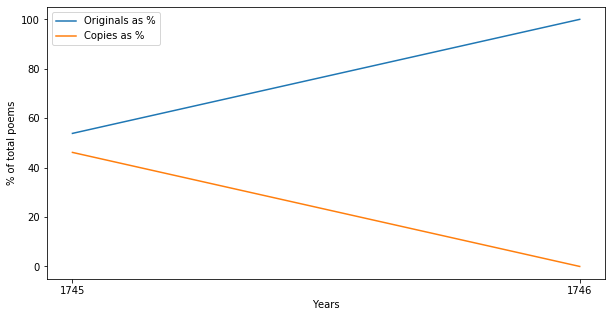

In [3]:
# process each title
for title in titles:

    # create a subset for the publication
    pub_df = df[df[vp.PUB_TITLE] == title]

    # date range for that publication
    min_year = pub_df[vp.YEAR].min()
    max_year = pub_df[vp.YEAR].max()
    year_range_index = np.arange(min_year, max_year + 1, 1)

    # columns we want 
    columns = np.array(['Total poems', 'Originals', 'Originals as %', 'Copies', 'Copies as %'])

    # create a results data frame
    results = pd.DataFrame(np.zeros(shape=(year_range_index.size, columns.size)), columns=columns,
                           index=year_range_index)

    for year in year_range_index:
        # get the subset for the year
        year_df = pub_df[pub_df[vp.YEAR] == year]

        # total number of poems
        total = year_df[vp.F_LINE].count()
        results.at[year, columns[0]] = total

        # total number of identified copies
        copies = year_df[vp.REF_NO].notnull().sum()
        results.at[year, columns[3]] = copies

        # originals (not identified as a copy)
        originals = total - copies
        results.at[year, columns[1]] = originals

        # originals as a percentage of total
        originals_percent = originals / total * 100
        results.at[year, columns[2]] = originals_percent

        # copies as percent of total
        copies_percent = copies / total * 100
        results.at[year,columns[4]] = copies_percent


    display(HTML('<h3>' + title + '</h3>'))
    display(HTML(results.to_html()))
    # results.info()
    plot.figure(figsize=(10,5))
    plot.plot(results[columns[2]])
    plot.plot(results[columns[4]])
    plot.legend([columns[2], columns[4]])
    plot.xticks(year_range_index, year_range_index)
    plot.xlabel("Years")
    plot.ylabel("% of total poems")
    plot.show()